This script allows you to visually inspect whether properties appear to have equilibrated and then outputs the final frame the AMBER inpcrd format that can be read by YANK

# Show key properties as a function of time

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

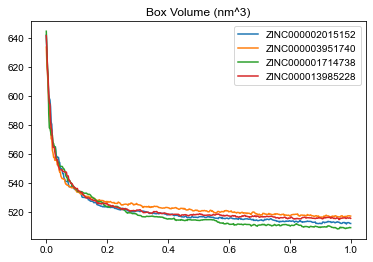

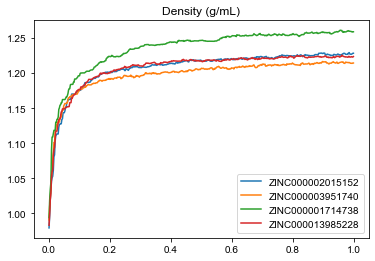

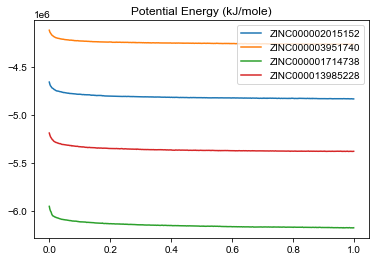

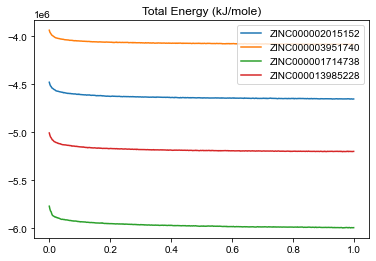

In [2]:
def plotTimeSeries(property='Box Volume (nm^3)'):
  plt.figure()
  import os, glob
  log_FNs = glob.glob('*.log')
  for log_FN in log_FNs:
    log = pd.read_csv(log_FN, sep='\t')
    values = log[property].to_numpy()
    times = np.array(range(len(values)))*2/1000
    plt.plot(times, values)
  plt.legend([FN.split('_')[0] for FN in log_FNs])
  plt.title(property)

for property in ['Box Volume (nm^3)', 'Density (g/mL)', 'Potential Energy (kJ/mole)', 'Total Energy (kJ/mole)']:
  plotTimeSeries(property)

In [3]:
import MDAnalysis as mda
import AMBERSingleFrame

import os, glob
log_FNs = glob.glob('*.log')
for log_FN in log_FNs:
  system_name = log_FN.split('.')[0][:-3]
  prmtop_FN = os.path.join('..','0-build',system_name+'.prmtop')
  dcd_FN = log_FN.split('.')[0] + '.dcd'
  if os.path.isfile(prmtop_FN) and os.path.isfile(dcd_FN):
    sim = mda.Universe(prmtop_FN, dcd_FN)
    sim.trajectory[-1]
    writer = AMBERSingleFrame.INPCRDWriter(system_name+'.inpcrd')
    writer.write(sim)
    writer.close()
  else:
    print(f'Topology {prmtop_FN} and/or trajectory file {dcd_FN} not found')